# Obervations and Thoughts

Ideally, when running drug trials, one wants to isolate what they are trialing for. For this study, the target area of interest is tumor volume. 10 drug regimens were tested for their efficacy in reducing tumor volumes found in mice across a given period of time in days, ranging from timepoint(day) 0 to timepoint(day) 45, allowing every drug to act within this time parameter.
 
 
Unfortunately, not every drug regimen was able to provide equal specimen data, with the range being `{151,230}`, or `79` data points. An inference of cause could be subject survivability, where each regimen initially began with a set subject count. This can be confirmed by taking the count of subjects at timepoint 0 and at timepoint 45, and when doing so, we find that yes, all trials started with 25 mice, with the exception of 2 trials, Propriva and Stelasyn who start with 24. Looking at the timepoint counts at timepoint 45, these numbers have mostly dropped, giving confidence to the idea of subject survivability affect timepoint data.
 
Those who show high survivability we would like to take further interest in. Capomulin and Ramicane both stand out as drugs that offer high subject survivability, and further exploration shows they also provide the smallest average tumor volume, the target of interest in this trial. With that idea in mind, we can follow this lead by observing the regimens which were found to have a SEM < 0.5 for Tumor Volume, which provides us with `Ramicane[.320]`, `Capomulin[.329]`, `Ceftamin[.469]` and `Infubinol[.492]`. All other regimens fail to give confidence.
 
Going further, from these 4 regimens we can analyze the difference in tumor volumes. Looking at a boxplot, we can view the range of tumor volumes found for each treatment at the final timepoint to view their ultimate efficacy. The boxplot shows a notable distinction. Ramicane and Capomulin both provide far smaller tumor volumes, albeit with a larger max/min range (Though both well below Ceftamin and Infubinol). `Ramicane` shows a range of `{22,45}` or `total 23`, and `Capmulin` shows a range of `{23,47`} or `total 24`. `Ceftamin` shows a range of `{59,68}` or `total 9`, and `Infubinol` shows a range of `{60,72}` or a `total of 12`. Even with their smaller range of variance, and therefore potential consistency, the target of these trials is ultimately drug efficacy in tumor reduction, and therefore even with higher variance, Ramicane and Capomulin both outclass the seemingly consistent Ceftamin and Infubinol.
 
Now that we have narrowed the results down to two potential candidate drugs, we can focus on Capomulin, as this is the drug of interest/ownership of the study providers. Fortunately, it seems to have performed well. Analysis of its correlation shows a strong positive direction of linearity, making the data a good candidate for testing regression, and the confident determination for Capomulin being an applicable tumor reduction therapy. Thus, we find the `correlation` to be `.950`, a strong linear relationship, and following, we find the `r2`value to be `.903`, a determinant result of a relationship.
 
Finally, with that determination we can with confidence put energy into the continued lab testing and trials with this drug of interest Capomulin.  

# Initial Setup & Dataset Creation

In [1]:
## Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
## Import mouse data csv files
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")

study_results = pd.read_csv("data/Study_results.csv")

## Combine the data into a single dataset & display results
mouse_study = pd.merge(study_results, mouse_metadata, how='outer' )

mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
## Check the number of mouse subjects in dataset & remove duplicates
print(f"Subject data in study: {mouse_study['Mouse ID'].count()}")

Subject data in study: 1893


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = mouse_study[mouse_study.duplicated( ['Mouse ID','Timepoint'] , keep=False)]

print(f"Duplicates ID's found: {mouse_duplicates['Mouse ID'].count()}")

mouse_duplicates.head()

Duplicates ID's found: 10


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean =  mouse_study.drop_duplicates( ['Mouse ID','Timepoint'] , keep=False)

print(f"Subject data left in study after duplicate removal: {mouse_study_clean['Mouse ID'].count()}")

mouse_study_clean.head()

Subject data left in study after duplicate removal: 1883


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


# Dataset Summary Statistics

In [74]:
## Creation of summary statistics table; Begin by isolating desired values.  
tumor_volume_df = mouse_study_clean[ ["Tumor Volume (mm3)","Drug Regimen"] ]

## Create groupby based off Regemin
summary_stats_group = tumor_volume_df.groupby(tumor_volume_df['Drug Regimen'])

## Start creating statistical data from the group, creating a dataframe from a statistical function.
tumor_volume_table = summary_stats_group.mean()

## Rename Axis for legibility
tumor_volume_table.index.name = "Tumor Volume / Drug Regimen"

## Rename the initially entered data column, apply the rest of the statisfical functions to the groupby object.
tumor_volume_table = tumor_volume_table.rename(columns = {"Tumor Volume (mm3)":"Mean"})

tumor_volume_table["Median"] = summary_stats_group.median()

tumor_volume_table["Variance"] = summary_stats_group.var()

tumor_volume_table["Standard Deviation"] = summary_stats_group.std()

tumor_volume_table["Standard Error Of Mean"] = summary_stats_group.sem()

tumor_volume_table.sort_values('Standard Error Of Mean')

,Mean,Median,Variance,Standard Deviation,Standard Error Of Mean
Tumor Volume / Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [73]:
##Create table using groupby aggregated functions
## Rename column titles to be legible for visual understanding. 
rename_list = ['Mean','Median','Variance','Standard Deviation','Standard Error of Mean']

tumor_volume_df = mouse_study_clean[ ["Tumor Volume (mm3)","Drug Regimen"] ]

tumor_volume_table = tumor_volume_df.groupby(tumor_volume_df['Drug Regimen']).agg(['mean','median','var','std','sem'])

tumor_volume_table.set_axis([rename_list],axis='columns')

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Timepoint Observations

In [41]:
## Start by isolating desired data
timepoint_regimen = mouse_study_clean[ ["Timepoint", "Drug Regimen"] ]

## Create groupby from the regimens
timepoint_regimen_group = timepoint_regimen.groupby(timepoint_regimen["Drug Regimen"])

## Find the count of the timepoint data
timepoint_regimen_count = (timepoint_regimen_group["Timepoint"].count())

## Create ready to plot dataframe for finalized data
timepoint_regimen_df = pd.DataFrame({'Drug Regimen':timepoint_regimen_count.index, 
                                     'Timepoint Counts':timepoint_regimen_count.values})

In [42]:
timepoint_regimen_df.sort_values(by=['Timepoint Counts'])

,Drug Regimen,Timepoint Counts
6,Propriva,151
1,Ceftamin,178
2,Infubinol,178
5,Placebo,181
8,Stelasyn,181
9,Zoniferol,182
4,Naftisol,186
3,Ketapril,188
7,Ramicane,228
0,Capomulin,230


In [45]:
timepoint_regimen_zero = timepoint_regimen.loc[timepoint_regimen['Timepoint'] == 0]
timepoint_regimen_zero_group = timepoint_regimen_zero.groupby(timepoint_regimen["Drug Regimen"])
timepoint_regimen_zero_count = (timepoint_regimen_zero_group["Timepoint"].count())
timepoint_zero_df = pd.DataFrame({'Drug Regimen':timepoint_regimen_zero_count.index, 
                                     'Timepoint Counts':timepoint_regimen_zero_count.values})
timepoint_zero_df.sort_values(['Timepoint Counts'])

,Drug Regimen,Timepoint Counts
6,Propriva,24
8,Stelasyn,24
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
7,Ramicane,25
9,Zoniferol,25


In [46]:
timepoint_regimen_max = timepoint_regimen.loc[timepoint_regimen['Timepoint'] == 45]
timepoint_regimen_max_group = timepoint_regimen_max.groupby(timepoint_regimen["Drug Regimen"])
timepoint_regimen_max_count = (timepoint_regimen_max_group["Timepoint"].count())
timepoint_max_df = pd.DataFrame({'Drug Regimen':timepoint_regimen_max_count.index, 
                                     'Timepoint Counts':timepoint_regimen_max_count.values})
timepoint_max_df.sort_values(['Timepoint Counts'])

,Drug Regimen,Timepoint Counts
6,Propriva,7
2,Infubinol,9
3,Ketapril,11
5,Placebo,11
8,Stelasyn,11
1,Ceftamin,13
4,Naftisol,13
9,Zoniferol,14
7,Ramicane,20
0,Capomulin,21


# Bar Charts
Two horizontal bar charts showing total amount of timepoint data across each drug regimen.

### Pandas
Pandas based horizontal bar chart showing the total number of timepoint data that exists for each subject across each drug regimen 

<AxesSubplot:ylabel='Drug Regimen'>

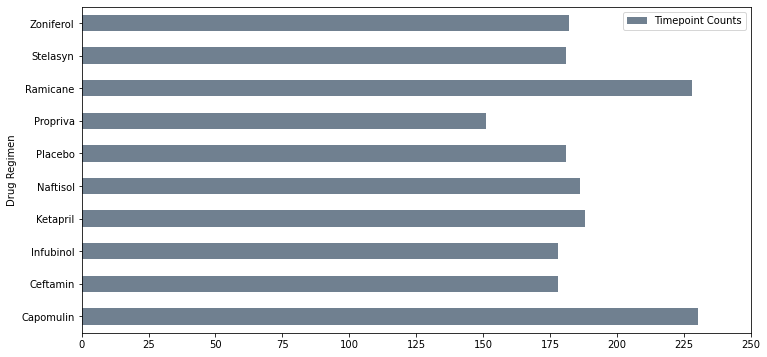

In [9]:
timepoint_regimen_df.plot.barh(x="Drug Regimen",y="Timepoint Counts", color="#708090",figsize=(12,6),
                               xticks=(0,25,50,75,100,125,150,175,200,225,250))

### Matplotlib
Matplotlib pyplot horizontal bar graph utilizing the finalized df created above, showing the total amount of timepoint data for the subjects across each drug regimen.

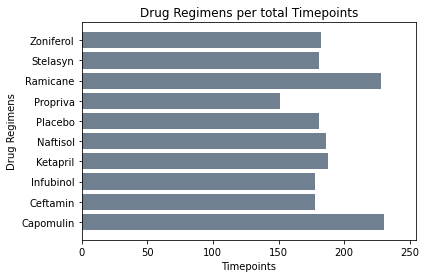

In [10]:
timepoint_x =(timepoint_regimen_df["Timepoint Counts"])
plt.barh(timepoint_regimen_df["Drug Regimen"],timepoint_x, color='slategrey', align="center")
plt.title('Drug Regimens per total Timepoints')
plt.ylabel('Drug Regimens')
plt.xlabel('Timepoints')
plt.xlim(0, max(timepoint_x)+25)
plt.show()

# Pie Charts
Two pie charts showing gender distibution among the subjects.

In [11]:
## Create a count of the genders.
gender_counts = pd.DataFrame({
    "Gender Count": mouse_study_clean["Sex"].value_counts()                          
                             })

### Pandas
Pandas pie chart showing the gender distribution of the mice in the study

<AxesSubplot:ylabel='Gender Count'>

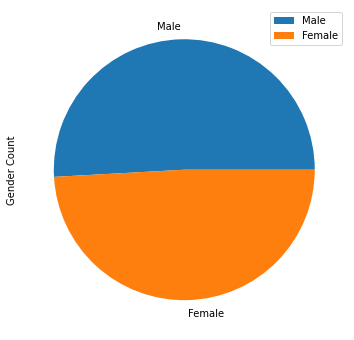

In [12]:

gender_counts.plot.pie(y="Gender Count", figsize=(6,6))

### Matplotlib
Matplotlib pyplot pie chart showing the gender distribution of mice in the study

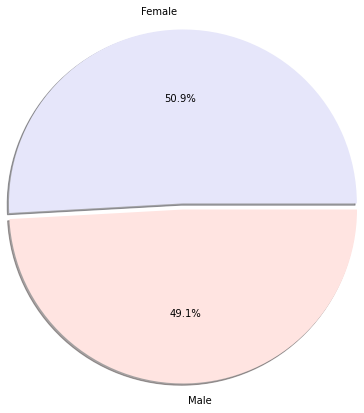

In [13]:
gender_colors = ["lavender","mistyrose"]

labels = ["Female","Male"]

explode = (0.07, 0)

plt.pie(gender_counts["Gender Count"], explode=explode, labels=labels, colors=gender_colors,
        autopct="%1.1f%%", shadow=True, radius = 2)
plt.show()

# Quartiles, Outliers and Boxplots
The calculation of final tumor volumes for each subject across four treatment regimens of interest. Those treatments are:

|Capomulin|Ramicane|Infubinol|Ceftamin|
| ----------- | ----------- | ----------- | ----------- |
| Drug One   |Drug Two  | Drug Three|Drug Four|


In [14]:
## Create a list of the desired treatments
desired_treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

## Get the final timepoint
volume_drug_timepoint = mouse_study_clean[ ["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"] ]
volume_drug_timepoint_max = volume_drug_timepoint[volume_drug_timepoint["Timepoint"] \
                                                  == volume_drug_timepoint["Timepoint"].max()]

## vdtm = volume_drug_timepoint_max
vdtm_sorted = volume_drug_timepoint_max.sort_values(["Drug Regimen"]).copy()

In [15]:
## Calculate the IQR and quantitatively determine if there are any potential outliers.
quar_range = vdtm_sorted['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowq = quar_range[.25]
upq = quar_range[.75]
iqr = upq - lowq

print(f"Lower Quartile: {lowq}")
print(f"Upper Quartile: {upq}")
print(f"IQR:{iqr}")

## Locate the rows which contain mice on each drug and get the tumor volumes
vdtm_regimen = vdtm_sorted.loc[(vdtm_sorted['Drug Regimen'].isin(desired_treatments))]
vdtm_regimen_index = vdtm_regimen.set_index(keys = ["Mouse ID"], drop=True)
print(f"Datapoints at max timepoint: {vdtm_regimen_index['Tumor Volume (mm3)'].count()}")

# Determine outliers using upper and lower bounds
lowbound = lowq - (1.5*iqr)
upbound =  upq + (1.5*iqr)
vdtm_regimen_outliers = vdtm_regimen_index.loc[
    (vdtm_regimen_index['Tumor Volume (mm3)'].between(lowbound,upbound,inclusive='both'))]
#No outliers determined.
print(f"Datapoints within boundary: {vdtm_regimen_outliers['Tumor Volume (mm3)'].count()}")

Lower Quartile: 40.6583443125
Upper Quartile: 68.8702959775
IQR:28.211951665000008
Datapoints at max timepoint: 63
Datapoints within boundary: 63


In [16]:
## Isolate each drug treatment
for treatment in desired_treatments:
    drug_one = vdtm_regimen_index.loc[(vdtm_regimen_index['Drug Regimen'] == desired_treatments[0])]
    drug_two = vdtm_regimen_index.loc[(vdtm_regimen_index['Drug Regimen'] == desired_treatments[1])]
    drug_three = vdtm_regimen_index.loc[(vdtm_regimen_index['Drug Regimen'] == desired_treatments[2])]
    drug_four = vdtm_regimen_index.loc[(vdtm_regimen_index['Drug Regimen'] == desired_treatments[3])]
    drug_info = pd.concat([drug_one, drug_two, drug_three, drug_four])

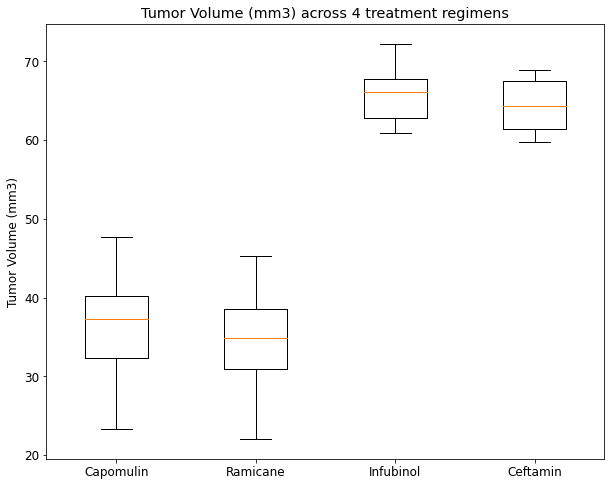

Capomulins maximum is 47.68596303(mm3),and minimum is 23.34359787(mm3)
Ramicanes maximum is 45.22086888(mm3),and minimum is 22.05012627(mm3)
Infubinols maximum is 72.2267309(mm3),and minimum is 60.91876652(mm3)
Ceftamins maximum is 68.92318457(mm3),and minimum is 59.74190064(mm3)


In [106]:
data = {desired_treatments[0]:drug_one['Tumor Volume (mm3)'],desired_treatments[1]:drug_two['Tumor Volume (mm3)'], 
        desired_treatments[2]:drug_three['Tumor Volume (mm3)'], desired_treatments[3]:drug_four['Tumor Volume (mm3)']}

tumor_box, ax1 = plt.subplots(figsize=(10, 8))
ax1
ax1.boxplot(data.values())
ax1.set_xticklabels(data.keys())
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_title('Tumor Volume (mm3) across 4 treatment regimens')

plt.show()
print(f'{desired_treatments[0]}s maximum is {drug_one["Tumor Volume (mm3)"].max()}(mm3),\
and minimum is {drug_one["Tumor Volume (mm3)"].min()}(mm3)')

print(f'{desired_treatments[1]}s maximum is {drug_two["Tumor Volume (mm3)"].max()}(mm3),\
and minimum is {drug_two["Tumor Volume (mm3)"].min()}(mm3)')

print(f'{desired_treatments[2]}s maximum is {drug_three["Tumor Volume (mm3)"].max()}(mm3),\
and minimum is {drug_three["Tumor Volume (mm3)"].min()}(mm3)')

print(f'{desired_treatments[3]}s maximum is {drug_four["Tumor Volume (mm3)"].max()}(mm3),\
and minimum is {drug_four["Tumor Volume (mm3)"].min()}(mm3)')

## Line Plot

In [18]:
drug_one_all = mouse_study_clean.loc[(mouse_study_clean['Drug Regimen'] == desired_treatments[0])]
drug_one_all = drug_one_all.sort_values(by = ['Timepoint'])
mouse_id = drug_one_all['Mouse ID'][0]
mouse_id_df = drug_one_all.loc[drug_one_all['Mouse ID'] == mouse_id]

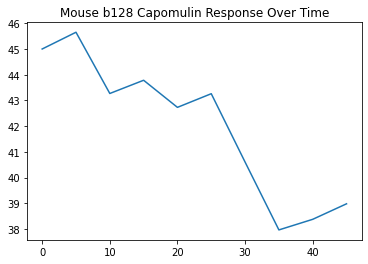

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(mouse_id_df['Timepoint'], mouse_id_df['Tumor Volume (mm3)'])
plt.title(f"Mouse {mouse_id_df['Mouse ID'][0]} Capomulin Response Over Time")
plt.show()

## Scatter plot

In [20]:
volume_weight_average = drug_one_all.groupby(by=['Weight (g)']).mean()

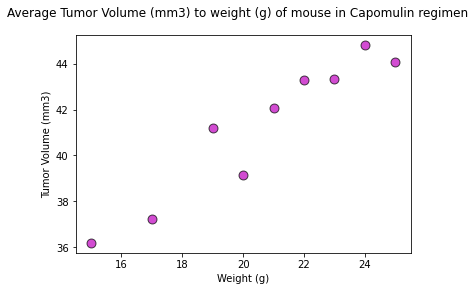

In [21]:
x_values = volume_weight_average.index
y_values = volume_weight_average['Tumor Volume (mm3)']

plt.scatter(x_values,y_values,s=(80),c="m",alpha=.7,edgecolors=("k"))
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.suptitle('Average Tumor Volume (mm3) to weight (g) of mouse in Capomulin regimen')
plt.show()

## Correlation and Regression

In [22]:
## Calculate the correlation coefficient and linear regression model 
## for mouse weight and average tumor volume for the Capomulin regimen

correlation  =  st.pearsonr(volume_weight_average['Tumor Volume (mm3)'],volume_weight_average.index)
print(f"The correlation \
coefficient for the average volume to weight from the Capomulin regimen is: {round(correlation[0],2)}")

The correlation coefficient for the average volume to weight from the Capomulin regimen is: 0.95


The volume to weight average r2 value is: 0.9034966277438602


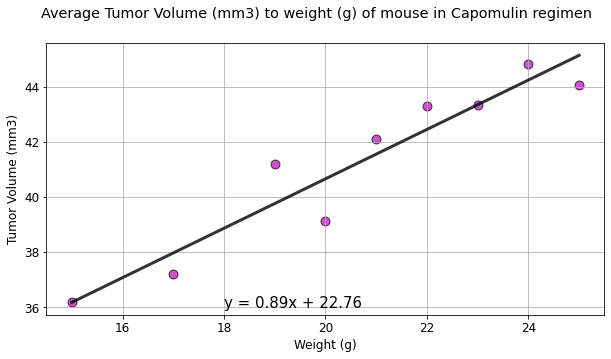

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,5))
plt.rc('font', size=12)
plt.grid(visible=True)
plt.scatter(x_values,y_values,s=(80),c="m",alpha=.7,edgecolors=("k"))
plt.plot(x_values,regress_values,"k-",linewidth=3,alpha=.8)
plt.annotate(line_eq,(18,36),fontsize=15,color="black")
print(f"The volume to weight average r2 value is: {rvalue**2}")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.suptitle('Average Tumor Volume (mm3) to weight (g) of mouse in Capomulin regimen')
plt.show()